# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
from functools import reduce

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [6]:
df = pd.read_csv('../../Datasets/index-5-NFCICREDIT.csv') #Dataset file
df.head()

,DATE,NFCICREDIT
0,1971-01-08,-1.90407
1,1971-01-15,-1.90886
2,1971-01-22,-1.91133
3,1971-01-29,-1.91241
4,1971-02-05,-1.91255


In [10]:
recession = pd.read_csv('../../Datasets/Recession.csv')
recession.head()

,DATE,JHDUSRGDPBR
0,1967-10-01,0.0
1,1968-01-01,0.0
2,1968-04-01,0.0
3,1968-07-01,0.0
4,1968-10-01,0.0


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

#### Preparing data for jobless claim
- change to datetime object **['DATE']**
- create columns
  - moving average **['SMA50']**
  - percent change from previous point(week) **['PCT']**

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])
# using .rolling(window).mean() with window size = 50
df = df.set_index('DATE')
# removing all the NULL values using dropna() method
df.dropna(inplace=True)
df.head()

,NFCICREDIT
DATE,
1971-01-08,-1.90407
1971-01-15,-1.90886
1971-01-22,-1.91133
1971-01-29,-1.91241
1971-02-05,-1.91255


#### Preparing data for recession periods
- change to datetime object **['DATE']**
- create lists
  - recession starting points 
  - recession ending points 

In [12]:
recession.columns = ['DATE', 'recession']
recession['DATE'] = pd.to_datetime(recession['DATE'])
start = []
end = []
for i, date in enumerate(recession.DATE):
  if i == 0 or i==len(recession.DATE)-1:
    continue
  if (recession.recession[i-1] == 0) & (recession.recession[i] == 1):
    start.append(date)
  elif (recession.recession[i] == 1) & (recession.recession[i+1] == 0):
    end.append(date)
print(start)
print(end)

[Timestamp('1969-04-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1979-04-01 00:00:00'), Timestamp('1981-04-01 00:00:00'), Timestamp('1989-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2007-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00')]
[Timestamp('1970-10-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1980-04-01 00:00:00'), Timestamp('1982-04-01 00:00:00'), Timestamp('1991-01-01 00:00:00'), Timestamp('2001-07-01 00:00:00'), Timestamp('2009-04-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]


In [13]:
Reces = pd.DataFrame()
Reces['start'] = start
Reces['end'] = end
Reces

,start,end
0,1969-04-01,1970-10-01
1,1973-10-01,1975-01-01
2,1979-04-01,1980-04-01
3,1981-04-01,1982-04-01
4,1989-10-01,1991-01-01
5,2001-01-01,2001-07-01
6,2007-10-01,2009-04-01
7,2020-01-01,2020-04-01


<Axes: xlabel='DATE'>

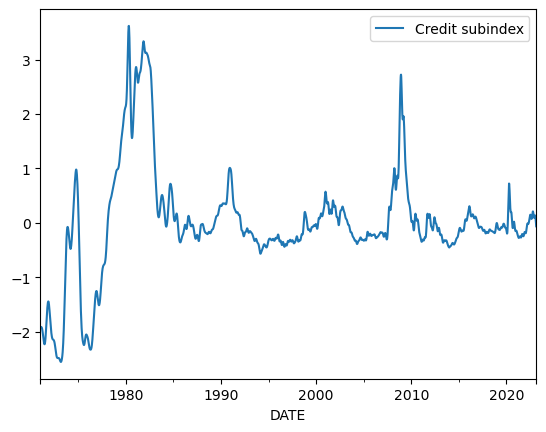

In [15]:
df.columns = ['Credit subindex']
df.plot()

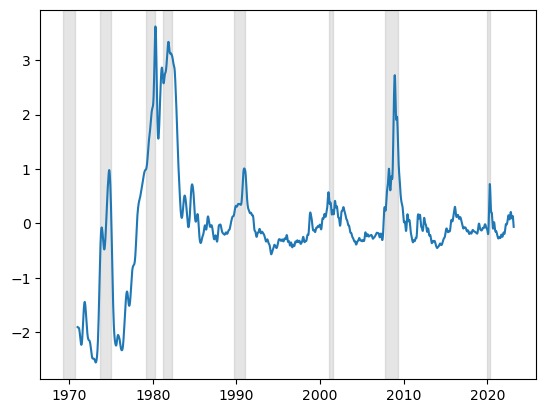

In [18]:
fig, ax = plt.subplots()
ax.plot(df.index, df['Credit subindex'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
# plt.ylim(0,1e6)
plt.show()

In [19]:
df2 = df.copy()
df2.index = df2.index + dt.timedelta(days=1*30)

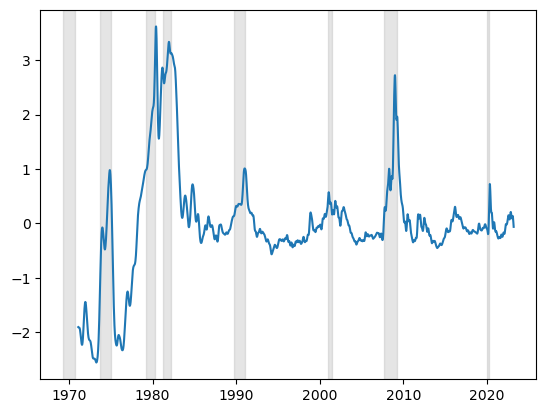

In [20]:
fig, ax = plt.subplots()
ax.plot(df2.index, df2['Credit subindex'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.show()

In [21]:
df2['MIN_1Y'] = np.nan
for i in range(len(df2)):
  if i >= 11:
    arr = np.array(df2['Credit subindex'])
    indices = [i-k for k in range(52)]
    take = np.take(arr, indices)
    df2['MIN_1Y'][i] = take.min()
  else:
    df2['MIN_1Y'][i] = np.nan

df2['CHG'] = (df2['Credit subindex'])/df2['MIN_1Y']

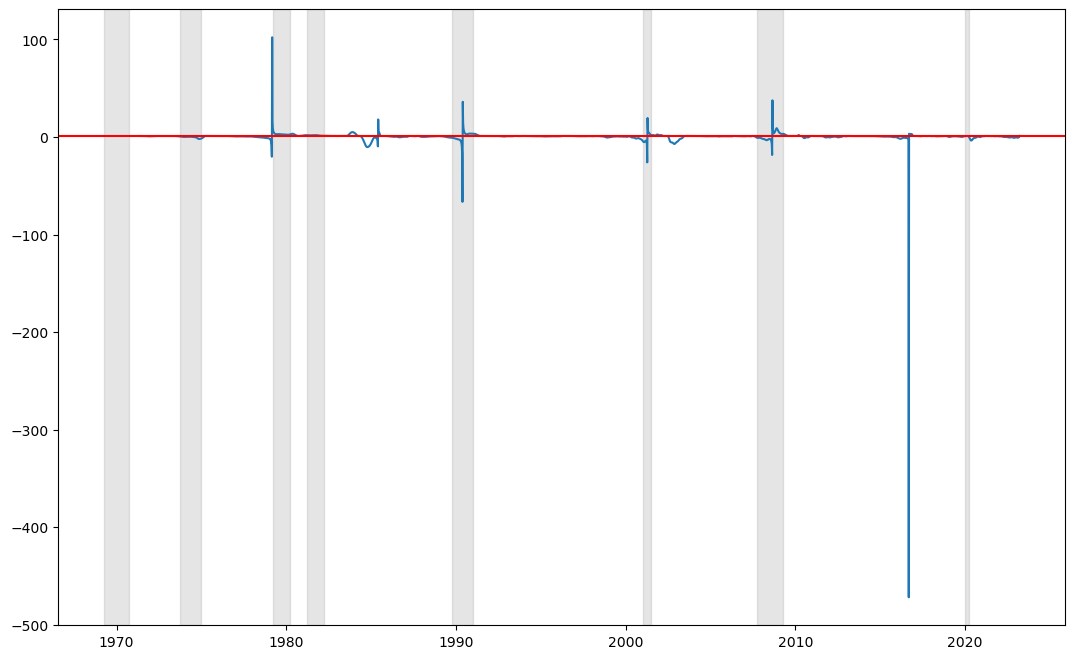

In [23]:
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df2.index, df2['CHG'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(1.15, color='red')
#plt.ylim(0.7,3)
plt.show()

In [14]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x>1.15))
df2

,Jobless,MAX_1Y,CHG,predict
DATE,,,,
1967-02-27,209000,NaN,NaN,0
1967-03-06,211000,NaN,NaN,0
1967-03-13,216500,NaN,NaN,0
1967-03-20,219500,NaN,NaN,0
1967-03-27,229000,NaN,NaN,0
...,...,...,...,...
2023-02-20,197500,170500.0,1.158358,1
2023-02-27,191750,170500.0,1.124633,0
2023-03-06,189000,170500.0,1.108504,0


In [15]:
li = []
for i in range(len(Reces)):
  li.append(df2.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
test = reduce(lambda x,y:x+y, li)
print(test.value_counts())
df2['recession'] = test.values.copy()

0    2496
1     430
Name: DATE, dtype: int64


In [16]:
df2

,Jobless,MAX_1Y,CHG,predict,recession
DATE,,,,,
1967-02-27,209000,NaN,NaN,0,0
1967-03-06,211000,NaN,NaN,0,0
1967-03-13,216500,NaN,NaN,0,0
1967-03-20,219500,NaN,NaN,0,0
1967-03-27,229000,NaN,NaN,0,0
...,...,...,...,...,...
2023-02-20,197500,170500.0,1.158358,1,0
2023-02-27,191750,170500.0,1.124633,0,0
2023-03-06,189000,170500.0,1.108504,0,0


In [17]:
def calc_TP_FP_rate(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_true[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

# Test function

calc_TP_FP_rate(df2['recession'], df2['predict'])

(0.6697674418604651, 0.18549679487179488)

In [18]:
# Containers for true positive / false positive rates
tp_rates = []
fp_rates = []

threshold = np.linspace(1.00,1.5,num=25)

# Find true positive / false positive rate for each threshold
for t in threshold:
    
    df2['predict'] = df2['CHG'].apply(lambda x: int(x>t))
    tp_rate, fp_rate = calc_TP_FP_rate(df2['recession'], df2['predict'])
        
    tp_rates.append(tp_rate)
    fp_rates.append(fp_rate)

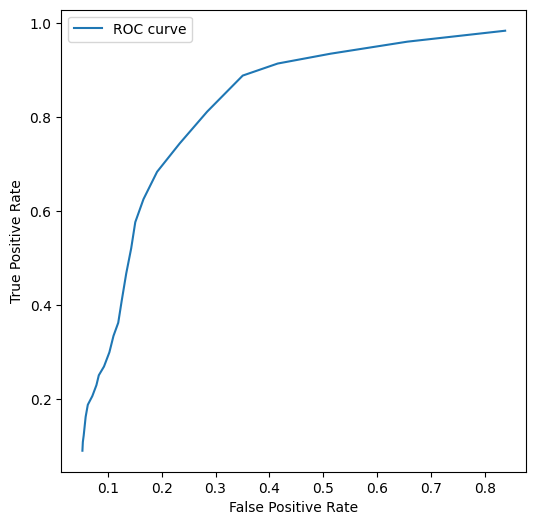

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fp_rates, tp_rates, label='ROC curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();

In [20]:
tot = []

for i in range(0,13):
  dfi = df.copy()
  dfi.index = dfi.index + dt.timedelta(days=i*30)

  dfi['MIN_1Y'] = np.nan
  for i in range(len(dfi)):
    if i >= 11:
      arr = np.array(dfi['Jobless'])
      indices = [i-k for k in range(52)]
      take = np.take(arr, indices)
      dfi.iloc[i,1] = take.min()
    else:
      dfi.iloc[i,1] = np.nan

  dfi['CHG'] = (dfi['Jobless'])/dfi['MIN_1Y']
  li = []
  for i in range(len(Reces)):
    li.append(dfi.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
  test = reduce(lambda x,y:x+y, li)
  dfi['recession'] = test.values.copy()
  # Containers for true positive / false positive rates
  tp_rates = []
  fp_rates = []

  threshold = np.linspace(1.00,1.5,num=25)

  # Find true positive / false positive rate for each threshold
  for t in threshold:
      
      dfi['predict'] = dfi['CHG'].apply(lambda x: int(x>t))
      tp_rate, fp_rate = calc_TP_FP_rate(dfi['recession'], dfi['predict'])
          
      tp_rates.append(tp_rate)
      fp_rates.append(fp_rate)
  
  tot.append([fp_rates, tp_rates])

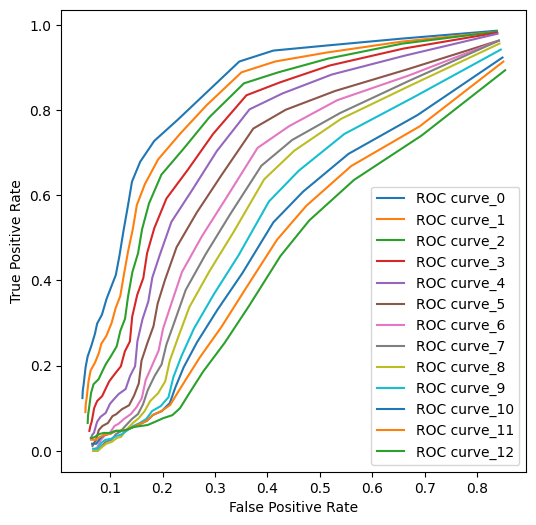

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
for i in range(len(tot)):
  ax.plot(tot[i][0], tot[i][1], label=f'ROC curve_{i}')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

auc score for 0 month(s) prediction 0.6677500179702823
auc score for 1 month(s) prediction 0.6439158467501491
auc score for 2 month(s) prediction 0.6208135076777448
auc score for 3 month(s) prediction 0.5940251845337949
auc score for 4 month(s) prediction 0.56471672665235
auc score for 5 month(s) prediction 0.5300159483700579
auc score for 6 month(s) prediction 0.5001311597226694
auc score for 7 month(s) prediction 0.47637117921459127
auc score for 8 month(s) prediction 0.4570857558139534
auc score for 9 month(s) prediction 0.42819635310624493
auc score for 10 month(s) prediction 0.4011158378399067
auc score for 11 month(s) prediction 0.38043378628136154
auc score for 12 month(s) prediction 0.35916240834336893


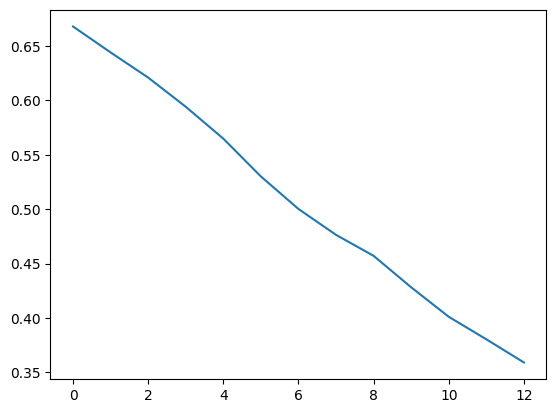

In [22]:
from sklearn.metrics import auc
auc_x = []
auc_y = []
for i in range(len(tot)):
  auc_x.append(i)
  auc_y.append(auc(tot[i][0], tot[i][1]))
  print(f'auc score for {i} month(s) prediction {auc_y[i]}')
plt.plot(auc_x, auc_y)

In [23]:
temp = pd.DataFrame()
temp['False negative'] = tot[1][0]
temp['True positive'] = tot[1][1]
temp

,False negative,True positive
0,0.837740,0.983721
1,0.656250,0.960465
2,0.513622,0.934884
3,0.415465,0.913953
4,0.350561,0.888372
5,0.284455,0.811628
6,0.233574,0.744186
7,0.191506,0.683721
8,0.166266,0.625581
9,0.151042,0.576744


In [24]:
# choose 0.166, 0.626 find threshold
threshold = np.linspace(1.00,1.5,num=25)
final_thres = threshold[8]

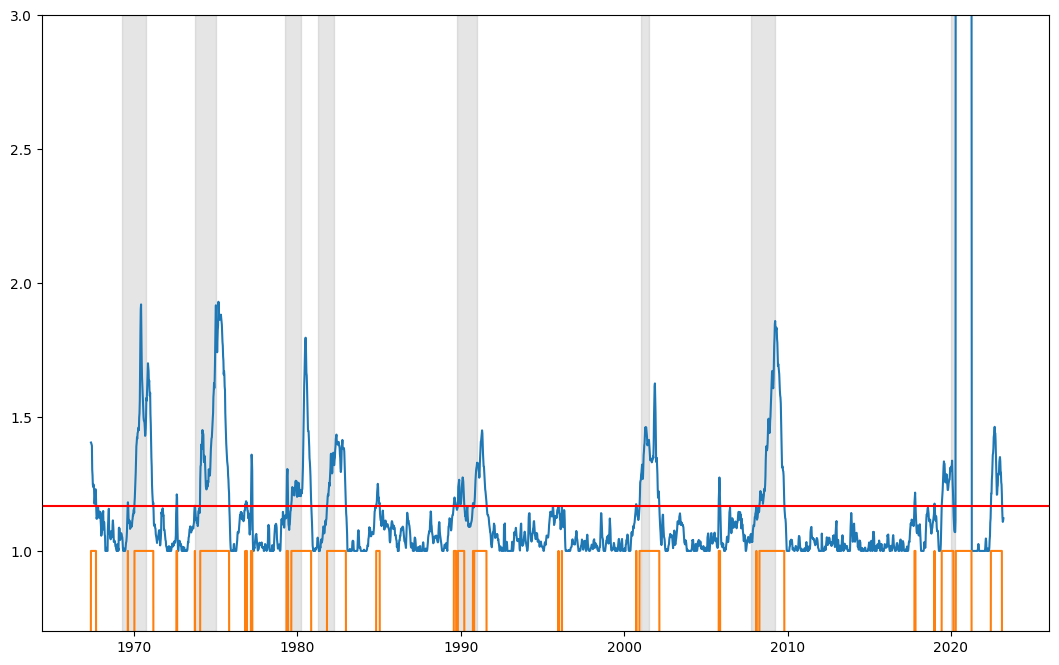

In [25]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x>final_thres))
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df2.index, df2['CHG'])
ax.plot(df2.index, df2['predict'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(final_thres, color='red')
plt.ylim(0.7,3)
plt.show()

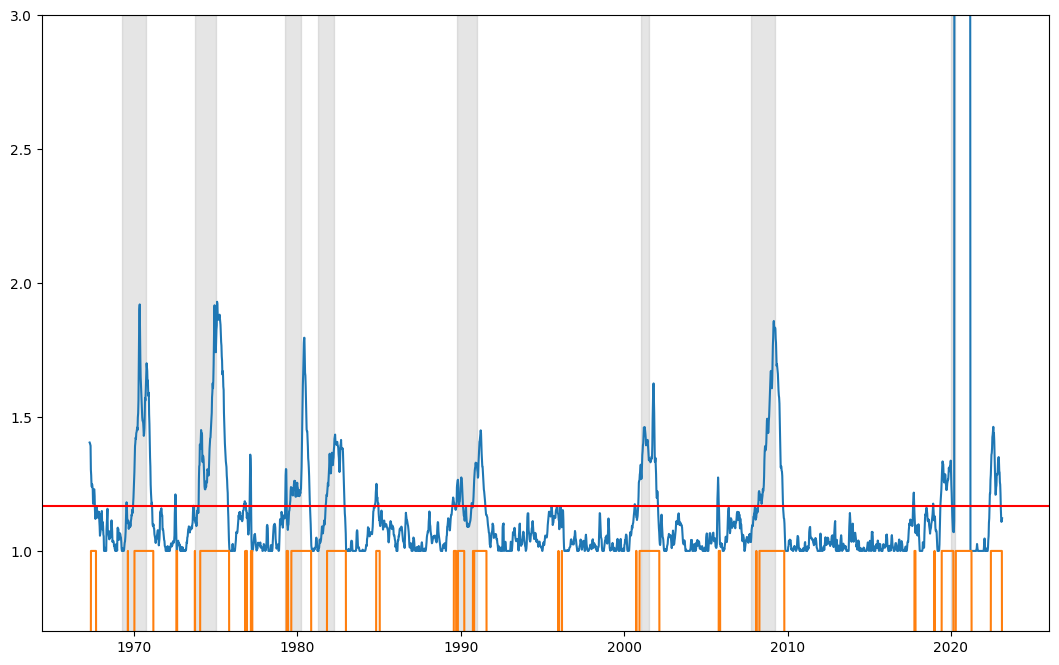

In [26]:
df2['predict'] = df2['CHG'].apply(lambda x: int(x>final_thres))
df3 = df2.copy()
fig, ax = plt.subplots(figsize=(13,8))
ax.plot(df.index, df2['CHG'])
ax.plot(df2.index, df2['predict'])
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
ax.axhline(final_thres, color='red')
plt.ylim(0.7,3)
plt.show()